In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Conv2D , MaxPool2D , Dense , ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
X_train = np.load('x_train.npy')
X_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
np.shape(X_train)

(60000, 28, 28)

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train = np.expand_dims(X_train , axis=3)

In [6]:
X_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
X_test = np.expand_dims(X_test , axis=3)

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1,1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(10 , activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 zero_padding2d_5 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                      

In [13]:
model.compile('adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [14]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [15]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=300 )

Epoch 1/10
200/200 [==============================] - 76s 375ms/step - loss: 0.2982 - accuracy: 0.9171 - val_loss: 0.0728 - val_accuracy: 0.9771
Epoch 2/10
200/200 [==============================] - 73s 363ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0450 - val_accuracy: 0.9851
Epoch 3/10
200/200 [==============================] - 56s 277ms/step - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 4/10
200/200 [==============================] - 46s 228ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0375 - val_accuracy: 0.9876
Epoch 5/10
200/200 [==============================] - 45s 226ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0371 - val_accuracy: 0.9875
Epoch 6/10
200/200 [==============================] - 45s 225ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0305 - val_accuracy: 0.9882
Epoch 7/10
200/200 [==============================] - 45s 226ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0343 - val_ac

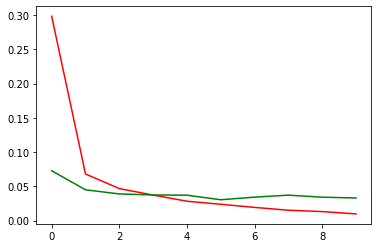

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')

In [18]:
data_test = pd.read_csv('test.csv')

In [32]:
X = data_test.to_numpy()

In [34]:
X.shape

(28000, 784)

In [35]:
X = X.reshape(X.shape[0], 28, 28)

In [36]:
X = np.expand_dims(X , axis=3)

In [37]:
X = X / 255.0

In [38]:
y_pred = model.predict(X)

875/875 [==============================] - 6s 7ms/step


In [41]:
np.argmax(y_pred[0])

2

In [49]:
y_pred_label = []
for i in range(0,len(y_pred)):
    y_pred_label.append(np.argmax(y_pred[i]))

In [50]:
y_pred_label

[2,
 0,
 9,
 0,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 3,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [53]:
sub = pd.read_csv('sample_submission.csv')
sub['Label'] = y_pred_label
sub.to_csv('sub.csv' , index=False)

In [54]:
sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
